### Exploratory Data Analysis (EDA)

In [ ]:
Перед запуском убедитесь, что в корне проекта есть файл .env и в нем заполнены выданные вам креды подключения к базам данных и хранилищу

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv, find_dotenv
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
# Подгружаем .env
load_dotenv()

In [ ]:
# Считываем все креды
dst_host = os.environ.get('DB_DESTINATION_HOST')
dst_port = os.environ.get('DB_DESTINATION_PORT')
dst_username = os.environ.get('DB_DESTINATION_USER')
dst_password = os.environ.get('DB_DESTINATION_PASSWORD')
dst_db = os.environ.get('DB_DESTINATION_NAME')

In [5]:
# Создаем соединение
dst_conn = create_engine(f'postgresql://{dst_username}:{dst_password}@{dst_host}:{dst_port}/{dst_db}')

#### 1. Flats

In [7]:
sql = f"""select * from flats"""
flats = pd.read_sql(sql, dst_conn)

In [8]:
flats.head()

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id
0,0,9,False,9.9,19.900000,1,False,35.099998,9500000,6220
1,1,7,False,0.0,16.600000,1,False,43.000000,13500000,18012
2,2,9,False,9.0,32.000000,2,False,56.000000,13500000,17821
3,3,1,False,10.1,43.099998,3,False,76.000000,20000000,18579
4,4,3,False,3.0,14.000000,1,False,24.000000,5200000,9293


In [5]:
flats.shape

(141362, 10)

In [6]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141362 entries, 0 to 141361
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            141362 non-null  int64  
 1   floor         141362 non-null  int64  
 2   is_apartment  141362 non-null  bool   
 3   kitchen_area  141362 non-null  float64
 4   living_area   141362 non-null  float64
 5   rooms         141362 non-null  int64  
 6   studio        141362 non-null  bool   
 7   total_area    141362 non-null  float64
 8   price         141362 non-null  int64  
 9   building_id   141362 non-null  int64  
dtypes: bool(2), float64(3), int64(5)
memory usage: 8.9 MB


In [7]:
flats.isnull().sum()

id              0
floor           0
is_apartment    0
kitchen_area    0
living_area     0
rooms           0
studio          0
total_area      0
price           0
building_id     0
dtype: int64

In [8]:
flats.describe()

,id,floor,kitchen_area,living_area,rooms,total_area,price,building_id
count,141362.000000,141362.000000,141362.000000,141362.000000,141362.000000,141362.000000,1.413620e+05,141362.000000
mean,70680.500000,7.467346,9.001579,31.056948,2.129476,62.374644,1.944162e+07,14053.665235
std,40807.838714,5.717144,5.264076,23.968640,0.994340,40.295864,6.626954e+07,6988.831066
min,0.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.100000e+01,1.000000
25%,35340.250000,3.000000,6.100000,19.000000,1.000000,39.299999,8.900000e+06,8535.250000
50%,70680.500000,6.000000,8.800000,29.400000,2.000000,53.000000,1.185000e+07,14332.000000
75%,106020.750000,10.000000,10.200000,41.400002,3.000000,72.000000,1.695000e+07,20475.000000
max,141361.000000,56.000000,203.000000,700.000000,20.000000,960.299988,9.873738e+09,24620.000000


Посмотрим распределение целочисленных переменных

(array([9.4705e+04, 4.4021e+04, 2.3580e+03, 2.3400e+02, 3.7000e+01,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

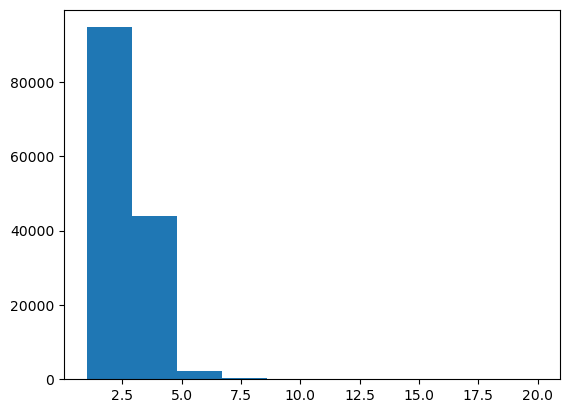

In [10]:
plt.hist(flats['rooms'])

(array([7.4623e+04, 3.7647e+04, 2.1994e+04, 4.4260e+03, 1.7200e+03,
        4.0400e+02, 2.8300e+02, 1.5400e+02, 6.8000e+01, 4.3000e+01]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

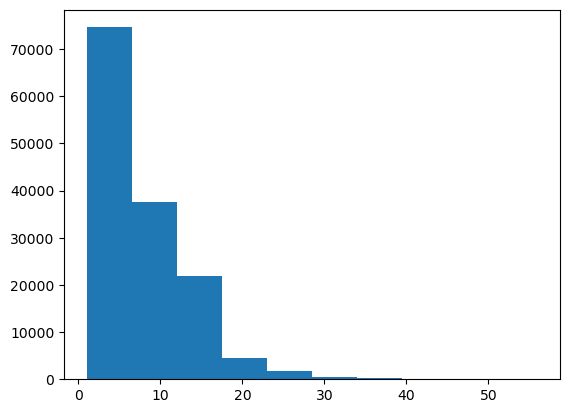

In [14]:
plt.hist(flats['floor'])

Оценим корреляцию признаков, связанных с площадью квартир

In [12]:
print(pearsonr(flats['living_area'], flats['total_area'])[0]) 
print(pearsonr(flats['kitchen_area'], flats['total_area'])[0]) 
print(pearsonr(flats['living_area'], flats['kitchen_area'])[0])

0.5753996274456243
0.3284773819024633
0.41837584075174955
0.5833927875854661


Выводы по таблице Flats:
- В таблице Flats отсутствуют константные признаки; 
- Целочисленные признаки floor и rooms можно считать категориальными;
- Все 3 колонки с площадями нужно сохранить, т.к. между ними нет значительной корреляции.

#### 2. Buildings

In [9]:
sql = f"""select * from buildings"""
buildings = pd.read_sql(sql, dst_conn)

In [10]:
buildings.head()

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator
0,6220,1965,6,55.717113,37.781120,2.64,84,12,True
1,18012,2001,2,55.794849,37.608013,3.00,97,10,True
2,17821,2000,4,55.740040,37.761742,2.70,80,10,True
3,18579,2002,4,55.672016,37.570877,2.64,771,17,True
4,9293,1971,1,55.808807,37.707306,2.60,208,9,True


In [13]:
buildings.shape

(24620, 9)

In [14]:
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24620 entries, 0 to 24619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24620 non-null  int64  
 1   build_year         24620 non-null  int64  
 2   building_type_int  24620 non-null  int64  
 3   latitude           24620 non-null  float64
 4   longitude          24620 non-null  float64
 5   ceiling_height     24620 non-null  float64
 6   flats_count        24620 non-null  int64  
 7   floors_total       24620 non-null  int64  
 8   has_elevator       24620 non-null  bool   
dtypes: bool(1), float64(3), int64(5)
memory usage: 1.5 MB


In [15]:
buildings.isnull().sum()

id                   0
build_year           0
building_type_int    0
latitude             0
longitude            0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
dtype: int64

In [16]:
buildings.describe()

,id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total
count,24620.00000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000,24620.000000
mean,12310.50000,1981.377295,3.153656,55.738892,37.593816,2.753557,184.882575,12.441024
std,7107.32615,22.657856,1.636435,0.101094,0.145408,0.277912,158.427509,6.271325
min,1.00000,1901.000000,0.000000,55.211460,36.864372,2.000000,1.000000,1.000000
25%,6155.75000,1965.000000,1.000000,55.668725,37.499031,2.640000,80.000000,8.000000
50%,12310.50000,1978.000000,4.000000,55.742020,37.588400,2.640000,139.000000,12.000000
75%,18465.25000,2002.000000,4.000000,55.811775,37.698833,2.900000,242.000000,16.000000
max,24620.00000,2023.000000,6.000000,56.011032,37.946411,27.000000,4455.000000,99.000000


Посмотрим распределение целочисленных признаков

(array([ 228.,  164.,  414.,  263., 3024., 6998., 3585., 2619., 4460.,
        2865.]),
 array([1901. , 1913.2, 1925.4, 1937.6, 1949.8, 1962. , 1974.2, 1986.4,
        1998.6, 2010.8, 2023. ]),
 <BarContainer object of 10 artists>)

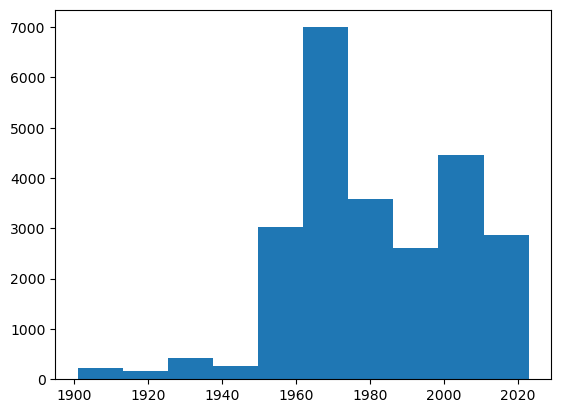

In [17]:
plt.hist(buildings['build_year'], bins=10)

(array([1.8002e+04, 5.0870e+03, 1.1280e+03, 2.8500e+02, 6.6000e+01,
        2.6000e+01, 0.0000e+00, 2.5000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 2.2370e+02, 4.4640e+02, 6.6910e+02, 8.9180e+02,
        1.1145e+03, 1.3372e+03, 1.5599e+03, 1.7826e+03, 2.0053e+03,
        2.2280e+03, 2.4507e+03, 2.6734e+03, 2.8961e+03, 3.1188e+03,
        3.3415e+03, 3.5642e+03, 3.7869e+03, 4.0096e+03, 4.2323e+03,
        4.4550e+03]),
 <BarContainer object of 20 artists>)

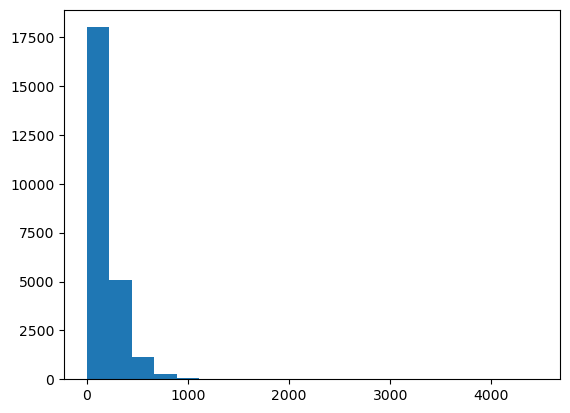

In [18]:
plt.hist(buildings['flats_count'], bins=20)

(array([5.6210e+03, 1.0674e+04, 5.8250e+03, 2.1400e+03, 1.9200e+02,
        1.0000e+02, 3.0000e+01, 1.9000e+01, 1.4000e+01, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.        ,  7.53333333, 14.06666667, 20.6       , 27.13333333,
        33.66666667, 40.2       , 46.73333333, 53.26666667, 59.8       ,
        66.33333333, 72.86666667, 79.4       , 85.93333333, 92.46666667,
        99.        ]),
 <BarContainer object of 15 artists>)

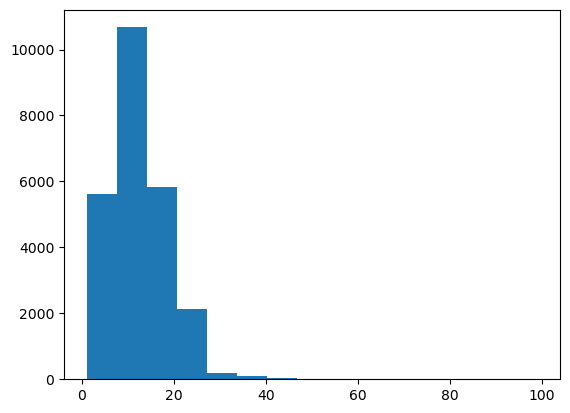

In [19]:
plt.hist(buildings['floors_total'], bins=15)

Выводы по таблице Buildings:
- Колонки latitude и longitude можно считать константными и исключить из числа признаков; 
- Все целочисленные признаки можно считать категориальными.